# Read data from the drive


If needed, mount your drive.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

The imeges should be preprocessed initially, and saved to the directory 'dir'. \\
An assumption is that the images file names are in the format: 'label-num.bmp'.

In [0]:
import numpy as np
import cv2	
import datetime, os
%matplotlib inline

dir = '...'
n_examples = 120
letters = ['A', 'E', 'I', 'O', 'U']

def read_data_processed():
    X = []
    y = np.repeat([0, 1, 2, 3, 4], n_examples)

    for label in [0, 1, 2, 3, 4]:
        print('Letter: {} ...'.format(label))
        for img_num in range(0, n_examples):
            path = '{}/{}-{}.bmp'.format(dir, label, img_num)

            img = cv2.imread(path)
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            X.append(gray_image)
    return X, y

X, y = read_data_processed()

Letter: 0 ...
Letter: 1 ...
Letter: 2 ...
Letter: 3 ...
Letter: 4 ...


# Feature extraction and analysis

Seven features are extracted from each emage. Every feature indicated the proportion of white pixels in some image part.

In [0]:
feat_labels = [
  'left', 'vertical', 'right', 'middle', 'up', 'horizontal', 'down']

def get_white_per_image(x):
    f = len([1
             for i in range(x.shape[0])
             for j in range(x.shape[1])
                if x[i, j] == 255])
    return f / (x.shape[0] * x.shape[1])

def feature_left_image_part(x):
    (h, w) = x.shape
    x_part = x[0 : h, 0 : round(w/5)]
    return get_white_per_image(x_part)

def feature_right_image_part(x):
    (h, w) = x.shape
    x_part = x[0 : h, round(4*w/5) : w]
    return get_white_per_image(x_part)

def feature_up_image_part(x):
    (h, w) = x.shape
    x_part = x[0 : round(h/5), 0 : w]
    return get_white_per_image(x_part)

def feature_down_image_part(x):
    (h, w) = x.shape
    x_part = x[round(4*h/5) : h, 0 : w]
    return get_white_per_image(x_part)

def feature_horizontal_middle_part(x):
    (h, w) = x.shape
    x_part = x[round(3*h/5) : round(4*h/5), 0 : w]
    return get_white_per_image(x_part)

def feature_vertical_middle_part(x):
    (h, w) = x.shape
    x_part = x[0 : h, round(3*w/5) : round(4*w/5)]
    return get_white_per_image(x_part)

def feature_middle_part(x):
    (h, w) = x.shape
    x_part = x[round(3*h/5) : round(4*h/5), round(3*w/5) : round(4*w/5)]
    return get_white_per_image(x_part)

def get_feature_vector(x):
    f1 = feature_left_image_part(x)
    f2 = feature_vertical_middle_part(x)
    f3 = feature_right_image_part(x)
    f4 = feature_middle_part(x)
    f5 = feature_up_image_part(x)
    f6 = feature_horizontal_middle_part(x)
    f7 = feature_down_image_part(x)

    return [f1, f2, f3, f4, f5, f6, f7]

def make_features(X):
    X_features = []
    for x in X:
        fvector = get_feature_vector(x)
        X_features.append(fvector)
    
    return np.matrix(X_features)

X_f = make_features(X)


Plot histogram for values of every feature for each letter. This should indicate the differences between letters.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_letter_indeces():
  a_idx = np.arange(0*n_examples, 1*n_examples)
  e_idx = np.arange(1*n_examples, 2*n_examples)
  i_idx = np.arange(2*n_examples, 3*n_examples)
  o_idx = np.arange(3*n_examples, 4*n_examples)
  u_idx = np.arange(4*n_examples, 5*n_examples)
  return a_idx, e_idx, i_idx, o_idx, u_idx

def histogram_f(X):
  a_idx, e_idx, i_idx, o_idx, u_idx = get_letter_indeces()
  idx = [a_idx, e_idx, i_idx, o_idx, u_idx]

  fig, ax = plt.subplots(5, 7, figsize=(20, 20))
  for letter_idx in range(5):
    for feat_idx in range(7):
        ax[letter_idx, feat_idx].hist(X[idx[letter_idx], feat_idx], bins='auto')
        ax[letter_idx, feat_idx].set_xlim([0, 0.6])

        if letter_idx == 0:
          ax[letter_idx, feat_idx].title.set_text("{}".format(feat_labels[feat_idx]))
        if feat_idx == 0:
          ax[letter_idx, feat_idx].set(ylabel="{}".format(letters[letter_idx]))
  fig.show()

histogram_f(X_f)


Plot the features in 2D after, after transforming feature vector with 't-SNE' or 'PCA' method.

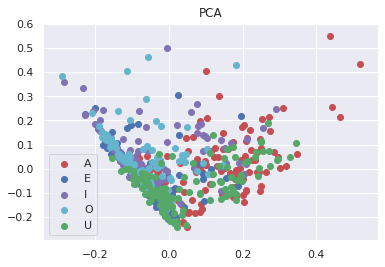

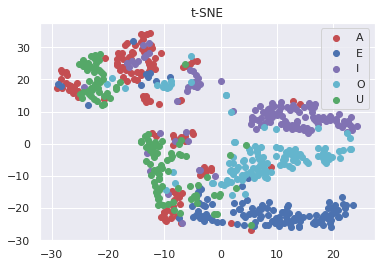

In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def plot_in_2d(X, method='t-SNE'):
    if method == 't-SNE':
        tsne = TSNE(2)  
        X_fit = tsne.fit_transform(X)
    elif method == 'PCA':
        pca = PCA(2)
        X_fit = pca.fit_transform(X)
    else:
      return None

    # Plot data in 2D
    a_idx, e_idx, i_idx, o_idx, u_idx = get_letter_indeces()
    plt.scatter(X_fit[a_idx, 0], X_fit[a_idx, 1], color='r', label='A')
    plt.scatter(X_fit[e_idx, 0], X_fit[e_idx, 1], color='b', label='E')
    plt.scatter(X_fit[i_idx, 0], X_fit[i_idx, 1], color='m', label='I')
    plt.scatter(X_fit[o_idx, 0], X_fit[o_idx, 1], color='c', label='O')
    plt.scatter(X_fit[u_idx, 0], X_fit[u_idx, 1], color='g', label='U')
    plt.legend()
    plt.title(method)
    plt.show()

    return X_fit

X_fit_pca= plot_in_2d(X_f, method='PCA')
X_fit_tsne = plot_in_2d(X_f)

# Design, train and evaluate model

Prepare data for the training, by shuffling it and deviding it to train and test set.

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_f, y = shuffle(X_f, y)
x_train, x_test, y_train, y_test = train_test_split(X_f, y, test_size=0.2)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

The neural network is very simple with one fully connected layer followed by softmax.

In [0]:
import tensorflow as tf

def get_trained_model(x_train, y_train, epochs):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(7, input_shape=(7, ), activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=epochs)
  return model

def evaluate_model(model, x_test, y_test):
  results = model.evaluate(x_test, y_test)
  print('Test accuracy: {0:.2f}%'.format(results[1] * 100))

model = get_trained_model(x_train, y_train, 600)
evaluate_model(model, x_test, y_test)

Find and print confusion matrix on the test set.

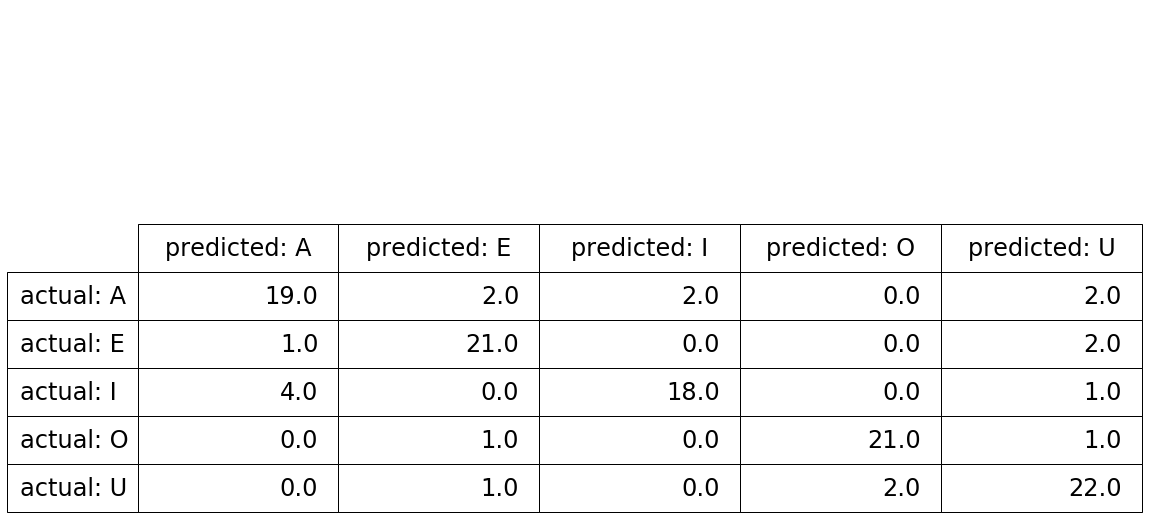

In [0]:
def get_confusion_matrix():
  conf_matrix = np.zeros((5, 5))

  predictions = model.predict(x_test)
  for example_num in range(len(predictions)):
    predicted_probs = predictions[example_num]
    predicted_class = np.argmax(predicted_probs)
    real_class = y_test[example_num]
    conf_matrix[real_class, predicted_class] += 1

  return conf_matrix

def cm_pretty_print(conf_matrix):
    row_labels = [
      'actual: A', 'actual: E', 'actual: I', 'actual: O', 'actual: U'
    ]
    col_labels = [
      'predicted: A', 'predicted: E', 'predicted: I', 'predicted: O', 'predicted: U'
    ]

    the_table = plt.table(cellText=conf_matrix,
                          colWidths=[0.15] * 5,
                          rowLabels=row_labels,
                          colLabels=col_labels)
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(24)
    the_table.scale(4, 4)

    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
    for pos in ['right','top','bottom','left']:
        plt.gca().spines[pos].set_visible(False)
    plt.savefig('matplotlib-table.png', bbox_inches='tight', pad_inches=0.05)

confusion_matrix = get_confusion_matrix()
cm_pretty_print(confusion_matrix)